In [1]:
import numpy as np

In [2]:
def compute_cost_linear(x,y,w,b):
    m = x.shape[0]
    cost = 0

    f_wb = w * x + b
    cost = np.sum((f_wb-y)**2)
    total_cost = (1/(2*m))*cost
    return total_cost

def compute_gradient_linear(x,y,w,b):
    m = x.shape[0]

    f_wb = w * x + b
    err = f_wb - y

    dj_dw = (1/m) * np.sum(err * x)
    dj_db = (1/m) * np.sum(err)

    return dj_dw , dj_db

In [3]:
x = np.array([1.0, 2.0])
y = np.array([300.0, 500.0])
w = 0
b = 0
print(compute_cost_linear(x,y,w,b))
print(compute_gradient_linear(x,y,w,b))

85000.0
(np.float64(-650.0), np.float64(-400.0))


In [25]:
def compute_cost_vectorized(x,y,w,b):
    m = x.shape[0]
    cost = 0
    
    f_wb = np.dot(x,w) + b
    cost = (1/(2*m)) * np.sum((f_wb - y)**2)
    return cost

def compute_gradient_vectorized(x,y,w,b):
    if x.ndim == 1: 
        x = x.reshape(-1,1)

    m,n = x.shape
    f_wb = np.dot(x,w) + b
    err = f_wb - y

    dj_dw = (1/m) * np.dot(x.T,err)
    dj_db = (1/m) * np.sum(err)

    return dj_dw,dj_db

In [40]:
x = np.array([1.0, 2.0])
y = np.array([300.0, 500.0])
print(f"shape of x:{x.shape}")
print(f"shape of y:{y.shape}")
w = 0
b = 0
print(compute_cost_vectorized(x,y,w,b))
print(compute_gradient_vectorized(x,y,w,b))

shape of x:(2,)
shape of y:(2,)
85000.0
(array([[-450., -750.]]), np.float64(-800.0))


In [68]:
import numpy as np
import copy

# --- 1. ROBUST FUNCTIONS ---
def sigmoid(z):
    z = np.clip(z, -500, 500) # Safety clip
    return 1.0 / (1.0 + np.exp(-z))

def compute_gradient(X, y, w, b):
    m = X.shape[0]
    # Prediction
    z = np.dot(X, w) + b
    f_wb = sigmoid(z)
    
    # Error
    err = f_wb - y 
    
    # Gradient (Vectorized)
    dj_dw = (1 / m) * np.dot(X.T, err)
    dj_db = (1 / m) * np.sum(err)
    
    return dj_dw, dj_db

def compute_cost(X, y, w, b):
    m = X.shape[0]
    z = np.dot(X, w) + b
    f_wb = sigmoid(z)
    epsilon = 1e-15
    f_wb = np.clip(f_wb, epsilon, 1 - epsilon)
    loss = -y * np.log(f_wb) - (1 - y) * np.log(1 - f_wb)
    return (1 / m) * np.sum(loss)

def gradient_descent(X, y, w_in, b_in, alpha, num_iters):
    w = copy.deepcopy(w_in)
    b = b_in
    J_hist = []
    
    print(f"Training on {X.shape[0]} examples with alpha={alpha}...")
    
    for i in range(num_iters):
        dj_dw, dj_db = compute_gradient(X, y, w, b)
        w = w - alpha * dj_dw
        b = b - alpha * dj_db
        
        # Save cost for reference
        if i < 100000:
            J_hist.append(compute_cost(X, y, w, b))
            
    return w, b, J_hist

# --- 2. DATA PREPARATION ---
# The Gap Data: 1-4 are Class 0, 6-9 are Class 1
X_train = np.array([[1.], [2.], [3.], [4.], [6.], [7.], [8.], [9.]])
y_train = np.array([0., 0., 0., 0., 1., 1., 1., 1.])

# Z-Score Normalization
mu = np.mean(X_train, axis=0)
sigma = np.std(X_train, axis=0)
X_norm = (X_train - mu) / sigma

# --- 3. EXECUTION ---
# Reset weights
w_init = np.zeros((1,))
b_init = 0.0

# Run Training (High iterations, Safe alpha)
w_final, b_final, J_hist = gradient_descent(X_norm, y_train, w_init, b_init, 0.1, 10000)

# --- 4. VERIFICATION ---
# Calculate the Decision Boundary in REAL WORLD units
# Formula: x = mu - (b_norm * sigma) / w_norm
boundary = mu - (b_final * sigma) / w_final

print(f"\nFinal Cost: {J_hist[-1]:.6f} (Target: < 0.1)")
print(f"Real World Decision Boundary: {boundary}")

print("\n--- SANITY CHECK ---")
# Let's check probability for x=4 (Should be Class 0) and x=6 (Should be Class 1)
test_vals = np.array([[4.], [6.]])
test_norm = (test_vals - mu) / sigma
z_out = np.dot(test_norm, w_final) + b_final
probs = sigmoid(z_out)

print(f"Probability for x=4: {probs[0]:.4f} (Target: < 0.5)")
print(f"Probability for x=6: {probs[1]:.4f} (Target: > 0.5)")

Training on 8 examples with alpha=0.1...

Final Cost: 0.006545 (Target: < 0.1)
Real World Decision Boundary: [5.]

--- SANITY CHECK ---
Probability for x=4: 0.0252 (Target: < 0.5)
Probability for x=6: 0.9748 (Target: > 0.5)


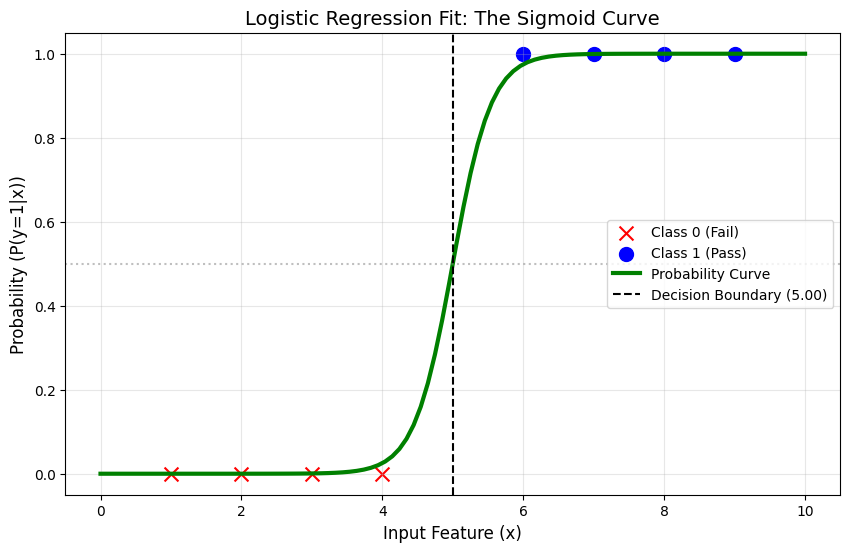

In [69]:
import matplotlib.pyplot as plt

# --- 1. SETUP THE DOMAIN ---
# Create a smooth range of X values from 0 to 10 to draw the curve
X_range = np.linspace(0, 10, 100).reshape(-1, 1)

# --- 2. CALCULATE PREDICTIONS ---
# We must Normalize this new range using the SAME mu/sigma from training
X_range_norm = (X_range - mu) / sigma

# Calculate Z and Sigmoid
z_range = np.dot(X_range_norm, w_final) + b_final
y_range_pred = sigmoid(z_range)

# --- 3. PLOTTING ---
plt.figure(figsize=(10, 6))

# Plot the Raw Data
# Class 0 (y=0)
mask_0 = (y_train == 0)
plt.scatter(X_train[mask_0], y_train[mask_0], c='red', marker='x', s=100, label='Class 0 (Fail)')

# Class 1 (y=1)
mask_1 = (y_train == 1)
plt.scatter(X_train[mask_1], y_train[mask_1], c='blue', marker='o', s=100, label='Class 1 (Pass)')

# Plot the Sigmoid Curve
plt.plot(X_range, y_range_pred, c='green', linewidth=3, label='Probability Curve')

# Plot the Decision Boundary (Vertical Line)
# We calculated 'boundary' in the previous step
plt.axvline(x=boundary, c='black', linestyle='--', label=f'Decision Boundary ({boundary[0]:.2f})')
plt.axhline(y=0.5, c='gray', linestyle=':', alpha=0.5)

# Labels and Styling
plt.title("Logistic Regression Fit: The Sigmoid Curve", fontsize=14)
plt.ylabel("Probability (P(y=1|x))", fontsize=12)
plt.xlabel("Input Feature (x)", fontsize=12)
plt.legend(loc='center right')
plt.grid(True, alpha=0.3)

plt.show()

Computing gradient descent

In [29]:
import math
import copy

In [30]:
def gradient_descent(x,y,w_in,b_in,alpha,num_iters,cost_function,gradient_function):
    w = copy.deepcopy(w_in)
    b = b_in
    j_history = []

    for i in range(num_iters):
        dj_dw,dj_db = compute_gradient_vectorized(x,y,w,b)

        w = w - alpha * dj_dw
        b = b - alpha * dj_db

        if i < 100000:
            j_history.append(cost_function(x,y,w,b))

        if(i % math.ceil(num_iters / 10)) == 0:
            print(f"Iteration {i:4d} cost {j_history[-1]:8.2f}")
    return w ,b,j_history

In [31]:
import numpy as np
import matplotlib.pyplot as plt

# --- 1. SETUP SYNTHETIC DATA ---
# Truth: y = 2x + 1
X_train = np.array([1.0, 2.0, 3.0, 4.0, 5.0])
y_train = np.array([3.0, 5.0, 7.0, 9.0, 11.0])

# --- 2. FIX THE PARAMETER SHAPE ---
# We have 1 feature, so we need exactly 1 weight.
w_init = np.zeros(1)  # Shape (1,)
b_init = 0.0
iterations = 1000
alpha = 0.01  # Learning Rate

# --- 3. RUN GRADIENT DESCENT ---
# Ensure you have defined gradient_descent, compute_cost_linear, and compute_gradient_linear
w_final, b_final, J_hist = gradient_descent(
    X_train, y_train, w_init, b_init, alpha, iterations, 
    compute_cost_linear, compute_gradient_linear
)



Iteration    0 cost    22.16
Iteration  100 cost     0.01
Iteration  200 cost     0.01
Iteration  300 cost     0.01
Iteration  400 cost     0.00
Iteration  500 cost     0.00
Iteration  600 cost     0.00
Iteration  700 cost     0.00
Iteration  800 cost     0.00
Iteration  900 cost     0.00


In [32]:
print(f"Final Found w: {w_final} (Target: [2.])")
print(f"Final Found b: {b_final:0.4f} (Target: 1.0000)")


Final Found w: [2.02113149] (Target: [2.])
Final Found b: 0.9237 (Target: 1.0000)


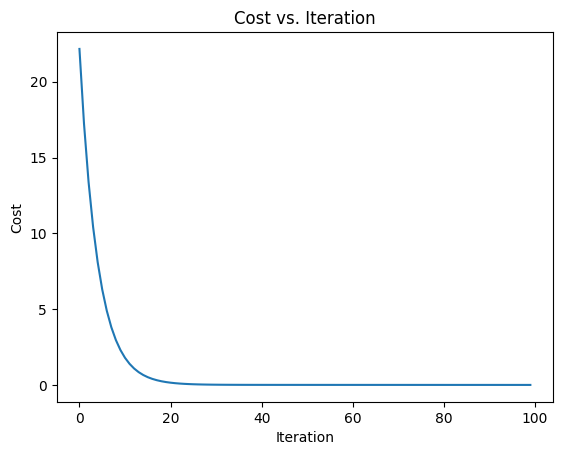

In [33]:
# --- 5. VISUALIZATION ---
plt.plot(J_hist[:100]) # Plotting first 100 iters to see the drop
plt.title("Cost vs. Iteration")
plt.ylabel('Cost')
plt.xlabel('Iteration')
plt.show()

Iteration    0 cost   718.06
Iteration  200 cost   341.21
Iteration  400 cost   320.04
Iteration  600 cost   309.84
Iteration  800 cost   304.92
Iteration 1000 cost   302.56
Iteration 1200 cost   301.42
Iteration 1400 cost   300.87
Iteration 1600 cost   300.60
Iteration 1800 cost   300.48
New w: [14.24847611] (Previous: ~2.0)
New b: -27.228976213072038 (Previous: ~1.0)


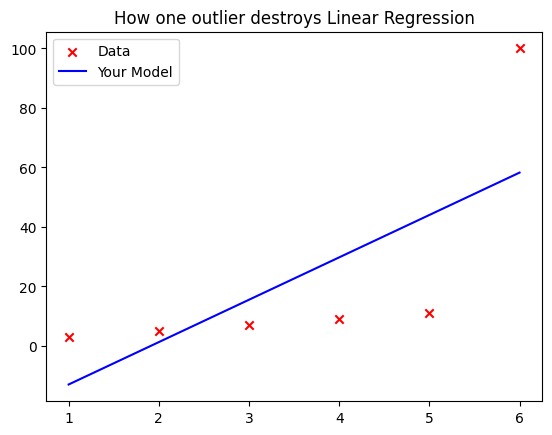

In [34]:
import matplotlib.pyplot as plt

# --- 1. DATA WITH OUTLIER ---
# Original nice data + One massive outlier at the end
X_train_bad = np.array([[1.0], [2.0], [3.0], [4.0], [5.0], [6.0]]) 
y_train_bad = np.array([3.0, 5.0, 7.0, 9.0, 11.0, 100.0]) # <--- The saboteur

# --- 2. RETRAIN ---
w_bad, b_bad, J_hist_bad = gradient_descent(
    X_train_bad, y_train_bad, w_init, b_init, 0.01, 2000, 
    compute_cost_vectorized, compute_gradient_vectorized
)

# --- 3. VISUALIZE THE DAMAGE ---
print(f"New w: {w_bad} (Previous: ~2.0)")
print(f"New b: {b_bad} (Previous: ~1.0)")

# Plotting the tragedy
plt.scatter(X_train_bad, y_train_bad, color='red', marker='x', label='Data')
# Plot the regression line
plt.plot(X_train_bad, w_bad*X_train_bad + b_bad, color='blue', label='Your Model')
plt.title("How one outlier destroys Linear Regression")
plt.legend()
plt.show()

None
[0.0000454 0.5       0.9999546]
